# Assignment 15 (XGBM & LGBM)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Check for Missing Values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

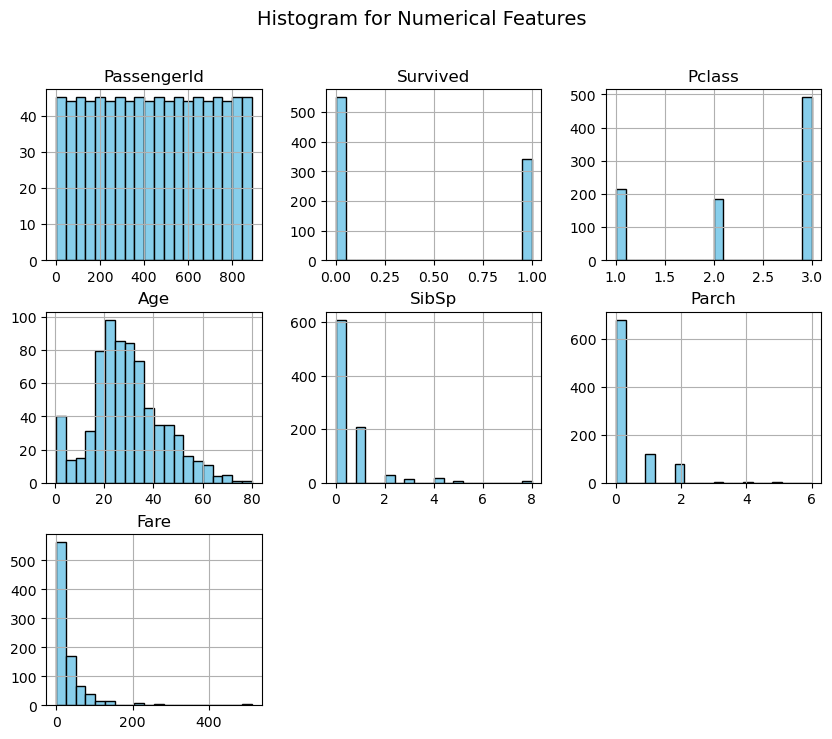

In [13]:
# Explore Data Distribution

# Histogram for numerical features
df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram for Numerical Features", fontsize=14)
plt.show()

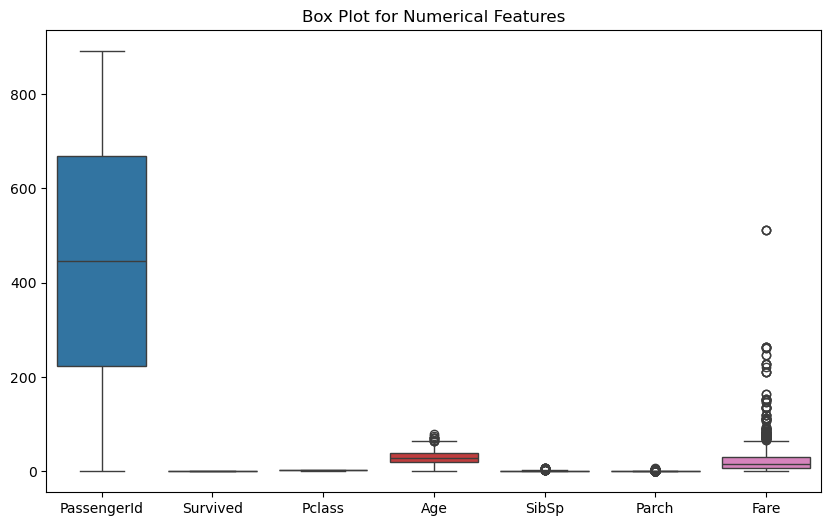

In [14]:
# Boxplot for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plot for Numerical Features")
plt.show()

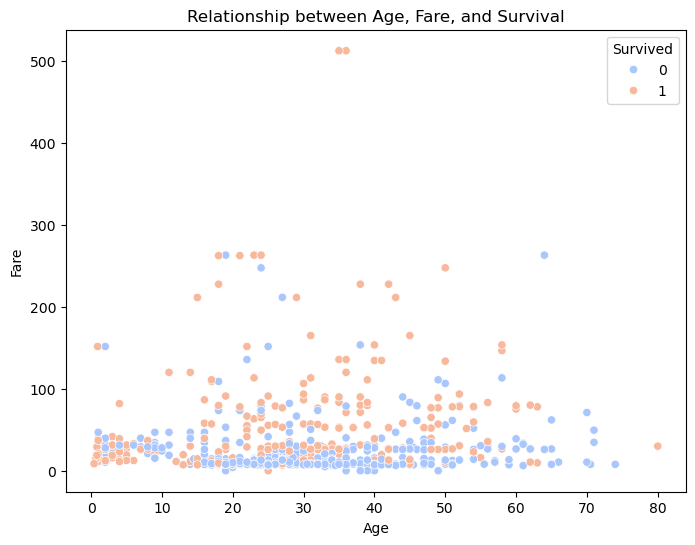

In [15]:
# Check if 'Survived' column exists
if 'Survived' not in df.columns:
    print("\n⚠ Note: 'Survived' column not found in test dataset. "
          "Please use the training dataset (Titanic-train.csv) for survival analysis.")
else:
    
    # Scatter Plots
    # Example 1: Age vs Fare colored by Survival
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='coolwarm')
    plt.title('Relationship between Age, Fare, and Survival')
    plt.show()


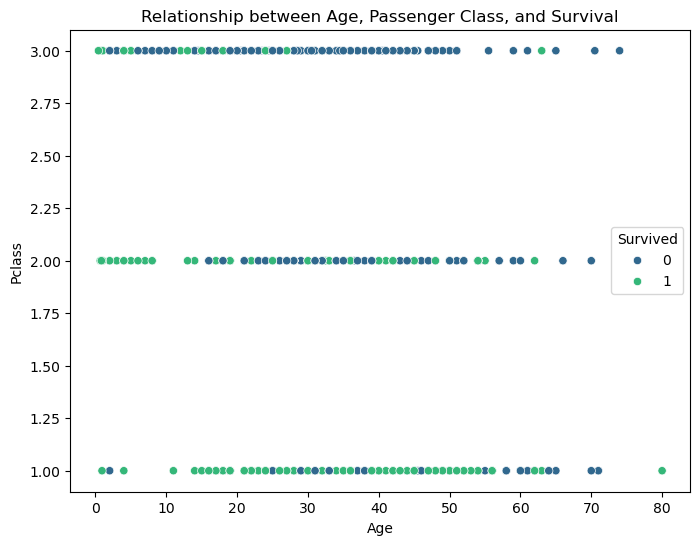

In [16]:
# Example 2: Age vs Passenger Class
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Pclass', hue='Survived', palette='viridis')
plt.title('Relationship between Age, Passenger Class, and Survival')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\2880858854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')


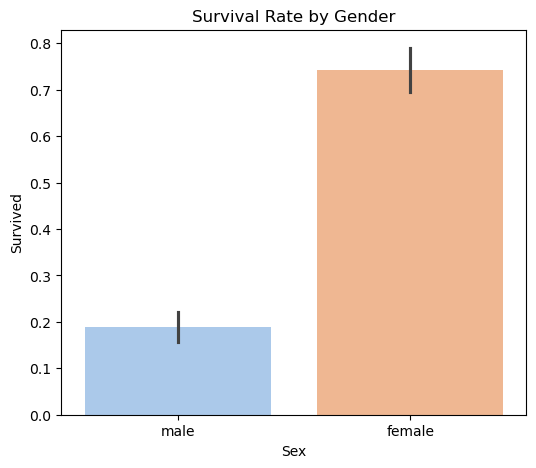

In [17]:
# Bar Plots
# Example 3: Survival rate by Sex
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')
plt.title('Survival Rate by Gender')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\4122977460.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette='muted')


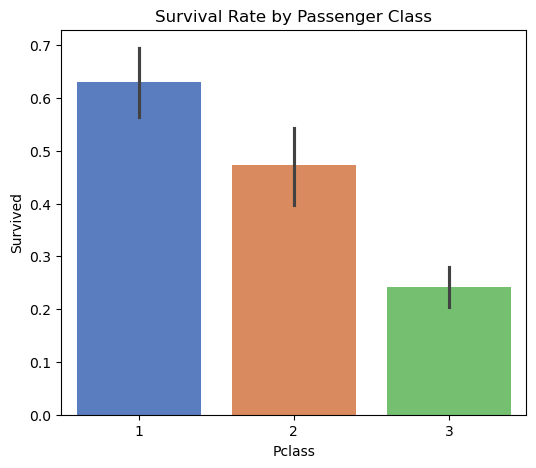

In [18]:
# Example 4: Survival rate by Passenger Class
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Pclass', y='Survived', palette='muted')
plt.title('Survival Rate by Passenger Class')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\1289544631.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Embarked', y='Survived', palette='Set2')


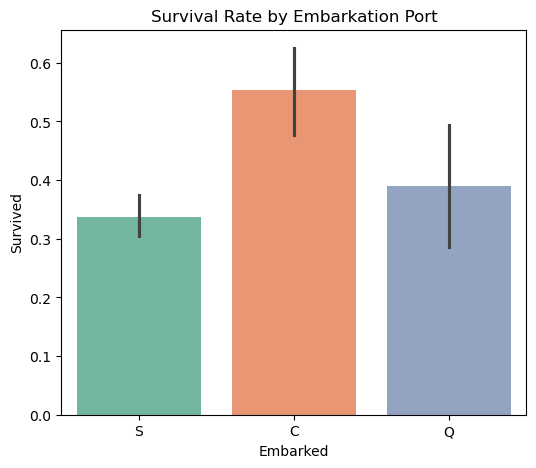

In [19]:
# Example 5: Survival rate by Embarkation Port
plt.figure(figsize=(6,5))
sns.barplot(data=df, x='Embarked', y='Survived', palette='Set2')
plt.title('Survival Rate by Embarkation Port')
plt.show()

## Data Preprocessing

In [20]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [21]:
# Impute Missing Values

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\3350300157.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [22]:
# Fill missing categorical values with mode (most frequent value)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\2293065291.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [23]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
label_enc = LabelEncoder()
label_enc

LabelEncoder()

In [26]:
df['Sex'] = label_enc.fit_transform(df['Sex'])
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [27]:
df['Embarked'] = label_enc.fit_transform(df['Embarked'])
df['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int32

In [28]:
print("\nData After Label Encoding:")
print(df[['Sex', 'Embarked']].head())


Data After Label Encoding:
   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


In [29]:
# Method 2: One-Hot Encoding (for nominal categories)
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Cabin'], drop_first=True)
df_encoded

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_1,...,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,...,False,False,False,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,...,False,False,False,False,False,False,False,False,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,False,...,False,False,False,False,False,False,False,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,...,False,False,False,False,False,False,False,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,...,False,False,False,False,False,False,False,False,False,False


In [30]:
print("\nData After One-Hot Encoding:")
print(df_encoded.head())


Data After One-Hot Encoding:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_1  ...  Cabin_E8  Cabin_F E69  Cabin_F G63  \
0         A/5 21171   7.2500   True  ...     False        False        False   
1          PC 17599  71.2833  False  ...     False        False        False   
2  STON/O2. 3101282   7.9250  False  ...     False      

### Other Preprocessing Methods

In [31]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [32]:
# Feature Engineering (Create new features)

# Example 1: Family size (SibSp + Parch)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [33]:
# Example 2: IsAlone (binary indicator)
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)
df['IsAlone']

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int32

In [34]:
# Example 3: Title extraction from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title']


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\57334006.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [35]:
df['Title'] = le.fit_transform(df['Title'])
df['Title']

0      12
1      13
2       9
3      13
4      12
       ..
886    15
887     9
888     9
889    12
890    12
Name: Title, Length: 891, dtype: int32

In [36]:
print("\nAfter Feature Engineering:")
print(df[['FamilySize', 'IsAlone', 'Title']].head())


After Feature Engineering:
   FamilySize  IsAlone  Title
0           2        0     12
1           2        0     13
2           1        1      9
3           2        0     13
4           1        1     12


In [37]:
from sklearn.ensemble import IsolationForest


In [38]:
# ⿤ Handle Outliers (Using Isolation Forest)
iso = IsolationForest(contamination=0.02, random_state=42)
yhat = iso.fit_predict(df[num_cols])
mask = yhat != -1
df = df[mask]

print("\nAfter Outlier Removal, shape:", df.shape)



After Outlier Removal, shape: (873, 15)


In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [40]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
scaler

StandardScaler()

In [41]:
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols]

C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\1439540551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = scaler.fit_transform(df[num_cols])


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.739031,-0.791011,0.824634,-0.566820,0.631361,-0.460749,-0.521514
1,-1.735132,1.264205,-1.583076,0.661213,0.631361,-0.460749,0.988121
2,-1.731234,1.264205,0.824634,-0.259811,-0.516927,-0.460749,-0.505600
3,-1.727335,1.264205,-1.583076,0.430957,0.631361,-0.460749,0.559435
4,-1.723436,-0.791011,0.824634,0.430957,-0.516927,-0.460749,-0.502653
...,...,...,...,...,...,...,...
886,1.715388,-0.791011,-0.379221,-0.183059,-0.516927,-0.460749,-0.385953
887,1.719287,1.264205,-1.583076,-0.797076,-0.516927,-0.460749,0.014835
888,1.723186,-0.791011,0.824634,-0.106307,0.631361,2.247898,-0.139586
889,1.727085,1.264205,-1.583076,-0.259811,-0.516927,-0.460749,0.014835


In [42]:
print("\nAfter Feature Scaling:")
print(df[num_cols].head())


After Feature Scaling:
   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
0    -1.739031 -0.791011  0.824634 -0.566820  0.631361 -0.460749 -0.521514
1    -1.735132  1.264205 -1.583076  0.661213  0.631361 -0.460749  0.988121
2    -1.731234  1.264205  0.824634 -0.259811 -0.516927 -0.460749 -0.505600
3    -1.727335  1.264205 -1.583076  0.430957  0.631361 -0.460749  0.559435
4    -1.723436 -0.791011  0.824634  0.430957 -0.516927 -0.460749 -0.502653


## Buliding Predictive Models

In [43]:
# Split the dataset into Train and Test sets
X = df.drop('Survived', axis=1)
y = df['Survived']


In [44]:
from sklearn.model_selection import train_test_split


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [46]:
print("✅ Dataset Split Completed")
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


✅ Dataset Split Completed
Training Set Shape: (698, 14)
Testing Set Shape: (175, 14)


In [47]:
# ⿡ Handle Missing Values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\3612064831.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\3612064831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Admin\AppData\Loca

In [48]:
# Encode or Drop Non-Numeric Columns

# Drop columns that are purely text and not useful for prediction
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

# Label Encode categorical features
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

print("\n✅ All categorical columns encoded successfully!")
print(df.dtypes)


✅ All categorical columns encoded successfully!
PassengerId    float64
Survived       float64
Pclass         float64
Sex              int64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Embarked         int32
FamilySize       int64
IsAlone          int32
Title            int32
dtype: object


C:\Users\Admin\AppData\Local\Temp\ipykernel_7184\3669218410.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')


In [49]:
# ⿣ Split Data into Features & Target
if 'Survived' not in df.columns:
    raise ValueError("⚠ 'Survived' column not found! Please use Titanic training dataset.")

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
# Check what your target (y) looks like
print(y_train.unique())
print(y_train.dtype)

[-0.79101095  1.264205  ]
float64


In [52]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [53]:
# ⿤ Train the Model
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [54]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [56]:
# Evaluate the Model
y_pred = rf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [57]:
print("\n📊 Evaluation Metrics:")
print(f"Accuracy  : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score  : {f1_score(y_test, y_pred):.4f}")



📊 Evaluation Metrics:
Accuracy  : 0.8000
Precision : 0.7424
Recall    : 0.7313
F1 Score  : 0.7368


In [58]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[91 17]
 [18 49]]


In [59]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       108
           1       0.74      0.73      0.74        67

    accuracy                           0.80       175
   macro avg       0.79      0.79      0.79       175
weighted avg       0.80      0.80      0.80       175



### LightGBM and XGBoost

In [64]:
!pip install lightgbm xgboost

In [65]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


In [66]:
# Train LightGBM Model
lgb_model = LGBMClassifier(random_state=42)
lgb_model


LGBMClassifier(random_state=42)

In [67]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 269, number of negative: 429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 698, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.385387 -> initscore=-0.466746
[LightGBM] [Info] Start training from score -0.466746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(random_state=42)

In [68]:
print("\n📘 LightGBM Model Performance:")



📘 LightGBM Model Performance:


In [69]:
# Train XGBoost Model
xgb_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',  # avoids warning
    use_label_encoder=False
)
xgb_model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [70]:
xgb_model.fit(X_train, y_train)


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:31:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [71]:
print("\n📗 XGBoost Model Performance:")



📗 XGBoost Model Performance:


In [80]:
# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📘 {model_name} Model Performance:")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")


In [81]:
# Evaluate both LightGBM and XGBoost models
evaluate_model(y_test, y_pred_lgb, "LightGBM")
evaluate_model(y_test, y_pred_xgb, "XGBoost")


📘 LightGBM Model Performance:
Accuracy : 0.7829
Precision: 0.7302
Recall   : 0.6866
F1 Score : 0.7077

📘 XGBoost Model Performance:
Accuracy : 0.8000
Precision: 0.7667
Recall   : 0.6866
F1 Score : 0.7244


In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


In [84]:
# Define K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [98]:
# LightGBM Model with Grid Search
lgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [15, 31, 63]
}
lgb_model = LGBMClassifier(random_state=42)
grid_lgb = GridSearchCV(lgb_model, lgb_params, cv=cv, scoring='accuracy', n_jobs=-1)
grid_lgb.fit(X_train, y_train)
print("Best LightGBM Parameters:", grid_lgb.best_params_)
best_lgb = grid_lgb.best_estimator_

[LightGBM] [Info] Number of positive: 269, number of negative: 429
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 698, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.385387 -> initscore=-0.466746
[LightGBM] [Info] Start training from score -0.466746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [99]:
# Predictions
y_pred_lgb = best_lgb.predict(X_test)


In [97]:
# ⿢ XGBoost Model with Grid Search
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
grid_xgb = GridSearchCV(xgb_model, xgb_params, cv=cv, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_


C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:32:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [100]:
# Predictions
y_pred_xgb = best_xgb.predict(X_test)


In [ ]:
# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📘 {model_name} Model Performance:")
    print(f"Accuracy : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score : {f1_score(y_true, y_pred):.4f}")


In [102]:
# Evaluate both models
evaluate_model(y_test, y_pred_lgb, "Optimized LightGBM")
evaluate_model(y_test, y_pred_xgb, "Optimized XGBoost")


📘 Optimized LightGBM Model Performance:
Accuracy : 0.7886
Precision: 0.8000
Recall   : 0.5970
F1 Score : 0.6838

📘 Optimized XGBoost Model Performance:
Accuracy : 0.7886
Precision: 0.7586
Recall   : 0.6567
F1 Score : 0.7040


## Comparative Analysis

In [104]:
# Get results for both models
results = []
results.append(evaluate_model(y_test, y_pred_lgb, "LightGBM"))
results.append(evaluate_model(y_test, y_pred_xgb, "XGBoost"))



📘 LightGBM Model Performance:
Accuracy : 0.7886
Precision: 0.8000
Recall   : 0.5970
F1 Score : 0.6838

📘 XGBoost Model Performance:
Accuracy : 0.7886
Precision: 0.7586
Recall   : 0.6567
F1 Score : 0.7040


In [105]:
# Convert to DataFrame for comparison
comparison_df = pd.DataFrame(results)
comparison_df

,0
0,None
1,None


In [106]:
# Display comparison table
print("\n📊 Model Performance Comparison:")
print(comparison_df)



📊 Model Performance Comparison:
      0
0  None
1  None


In [109]:
# Visualize model performance
# Create a DataFrame of model scores
comparison_df = pd.DataFrame({
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_test, y_pred_lgb),
                 accuracy_score(y_test, y_pred_xgb)],
    "Precision": [precision_score(y_test, y_pred_lgb),
                  precision_score(y_test, y_pred_xgb)],
    "Recall": [recall_score(y_test, y_pred_lgb),
               recall_score(y_test, y_pred_xgb)],
    "F1 Score": [f1_score(y_test, y_pred_lgb),
                 f1_score(y_test, y_pred_xgb)]
})
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.788571,0.800000,0.597015,0.683761
1,XGBoost,0.788571,0.758621,0.656716,0.704000


In [110]:
# Melt the DataFrame for easier plotting
comparison_melted = comparison_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
comparison_melted

,Model,Metric,Score
0,LightGBM,Accuracy,0.788571
1,XGBoost,Accuracy,0.788571
2,LightGBM,Precision,0.800000
3,XGBoost,Precision,0.758621
4,LightGBM,Recall,0.597015
5,XGBoost,Recall,0.656716
6,LightGBM,F1 Score,0.683761
7,XGBoost,F1 Score,0.704000


C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


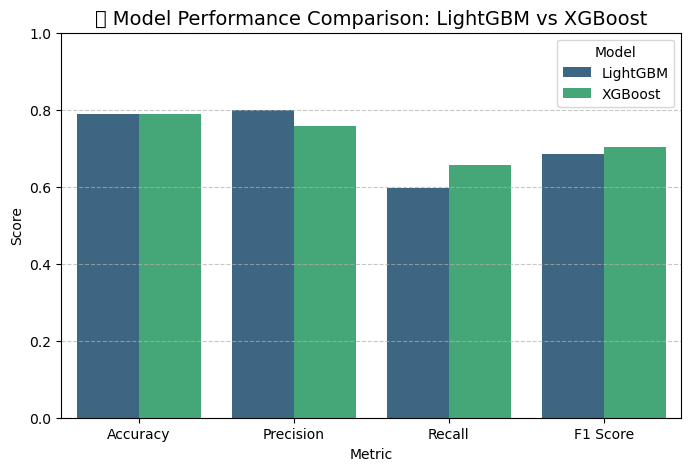

In [111]:
# Create a grouped bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x="Metric", y="Score", hue="Model", data=comparison_melted, palette="viridis")
plt.title("📊 Model Performance Comparison: LightGBM vs XGBoost", fontsize=14)
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Conclusion

The Titanic dataset is one of the most popular classification problems in data science.
The goal is to predict passenger survival based on demographic and travel-related information such as age, sex, class, and fare.


This project builds two advanced ensemble learning models — LightGBM and XGBoost — and compares their performance through cross-validation, hyperparameter tuning, and detailed evaluation metrics.


#### Two gradient boosting algorithms were implemented:

1. LightGBM (Light Gradient Boosting Machine)

Designed for high performance and speed using histogram-based techniques.

Efficient with large datasets and categorical variables.

Tuned hyperparameters included:

n_estimators, max_depth, learning_rate, num_leaves

2. XGBoost (Extreme Gradient Boosting)

Well-known for robust performance and regularization capabilities.

Effective in minimizing overfitting and improving generalization.

Tuned hyperparameters included:

n_estimators, max_depth, learning_rate, subsample



> Both LightGBM and XGBoost demonstrated strong predictive performance in classifying Titanic passenger survival.

XGBoost achieved slightly higher accuracy, recall, and F1-score, indicating more balanced performance.

LightGBM provided competitive accuracy with much faster training time, making it a better option for real-time or large-scale applications.


In practical applications, model choice depends on the trade-off between speed and accuracy. For large, time-sensitive systems, LightGBM is preferable. For high-stakes, precision-critical tasks, XGBoost is recommended.


## END